In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
dec_fraude = pd.read_csv('C:/Users/Pc/Desktop/Máster/Data Science (Pontia)/Proyecto Jupyter/Csv/dec_fraude.csv')

In [3]:
dec_fraude.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
dec_fraude.sample(5)

,t_id,tipo,tiempo,monto,cl_origen,cl_destino,es_fraude,mensaje_alarma,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des
1385049,1385071,PAYMENT,2022-09-07 00:00:00,18618.59,C446314597,M723680113,0,No,0.0,0.0,0.00,0.00
5089426,5089506,PAYMENT,2022-09-16 01:00:00,10186.68,C1940011193,M1644341579,0,No,0.0,0.0,0.00,0.00
3056309,3056360,CASH_OUT,2022-09-11 00:00:00,164287.62,C28331798,C384264129,0,No,0.0,0.0,5480043.32,5644330.94
3093550,3093604,PAYMENT,2022-09-11 01:00:00,9031.92,C1714761662,M15191091,0,No,57.0,0.0,0.00,0.00
1441937,1441960,TRANSFER,2022-09-07 02:00:00,2362760.81,C1976624270,C1324093721,0,No,0.0,0.0,395959.27,2758720.08


In [5]:
dec_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362520 entries, 0 to 6362519
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_id              int64  
 1   tipo              object 
 2   tiempo            object 
 3   monto             float64
 4   cl_origen         object 
 5   cl_destino        object 
 6   es_fraude         int64  
 7   mensaje_alarma    object 
 8   balance_prev_or   float64
 9   balance_post_or   float64
 10  balance_prev_des  float64
 11  balance_post_des  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 582.5+ MB


In [6]:
dec_fraude['tipo'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
# Categorizamos la columna tipo
mapeo = {'PAYMENT': 0, 'TRANSFER': 1, 'CASH_OUT': 2, 'DEBIT': 3, 'CASH_IN': 4}
dec_fraude['tipo_cod'] = dec_fraude['tipo'].map(mapeo)

In [8]:
# Hacemos un estudio de correlacion
corr_matrix = dec_fraude.corr()

C:\Users\Pc\AppData\Local\Temp\ipykernel_10264\2039478174.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dec_fraude.corr()


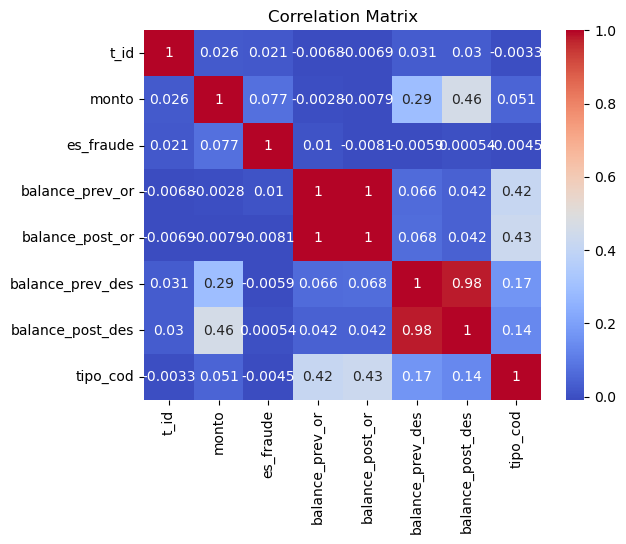

In [9]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [10]:
dec_fraude.tail(5)

,t_id,tipo,tiempo,monto,cl_origen,cl_destino,es_fraude,mensaje_alarma,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des,tipo_cod
6362515,6362615,CASH_OUT,2022-10-02 05:00:00,339682.13,C786484425,C776919290,1,No,339682.13,0.0,0.00,339682.13,2
6362516,6362616,TRANSFER,2022-10-02 05:00:00,6311409.28,C1529008245,C1881841831,1,No,6311409.28,0.0,0.00,0.00,1
6362517,6362617,CASH_OUT,2022-10-02 05:00:00,6311409.28,C1162922333,C1365125890,1,No,6311409.28,0.0,68488.84,6379898.11,2
6362518,6362618,TRANSFER,2022-10-02 05:00:00,850002.52,C1685995037,C2080388513,1,No,850002.52,0.0,0.00,0.00,1
6362519,6362619,CASH_OUT,2022-10-02 05:00:00,850002.52,C1280323807,C873221189,1,No,850002.52,0.0,6510099.11,7360101.63,2


In [11]:
dec_fraude.describe()

,t_id,monto,es_fraude,balance_prev_or,balance_post_or,balance_prev_des,balance_post_des,tipo_cod
count,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06,6.362520e+06
mean,3.181312e+06,1.798620e+05,1.290212e-03,8.338892e+05,8.551206e+05,1.100707e+06,1.225002e+06,1.686313e+00
std,1.836730e+06,6.038617e+05,3.589635e-02,2.888257e+06,2.924063e+06,3.399201e+06,3.674152e+06,1.491357e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.590656e+06,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.181316e+06,7.487271e+04,0.000000e+00,1.420800e+04,0.000000e+00,1.327077e+05,2.146622e+05,2.000000e+00
75%,4.771964e+06,2.087216e+05,0.000000e+00,1.073150e+05,1.442585e+05,9.430375e+05,1.111909e+06,2.000000e+00
max,6.362619e+06,9.244552e+07,1.000000e+00,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,4.000000e+00


In [12]:
dec_fraude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362520 entries, 0 to 6362519
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_id              int64  
 1   tipo              object 
 2   tiempo            object 
 3   monto             float64
 4   cl_origen         object 
 5   cl_destino        object 
 6   es_fraude         int64  
 7   mensaje_alarma    object 
 8   balance_prev_or   float64
 9   balance_post_or   float64
 10  balance_prev_des  float64
 11  balance_post_des  float64
 12  tipo_cod          int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 631.0+ MB


In [16]:
dec_fraude['tiempo'] = pd.to_datetime(dec_fraude['tiempo'])
dec_fraude[['t_id', 'es_fraude','tipo_cod']] = dec_fraude[['t_id', 'es_fraude','tipo_cod']].astype(int)

In [17]:
fraude = dec_fraude

In [20]:
fraude.dtypes

t_id                         int32
tipo                        object
tiempo              datetime64[ns]
monto                      float64
cl_origen                   object
cl_destino                  object
es_fraude                    int32
mensaje_alarma              object
balance_prev_or            float64
balance_post_or            float64
balance_prev_des           float64
balance_post_des           float64
tipo_cod                     int32
dtype: object

In [26]:
fraude['tipo'].value_counts()

CASH_OUT    2237463
PAYMENT     2151458
CASH_IN     1399270
TRANSFER     532897
DEBIT         41432
Name: tipo, dtype: int64

In [27]:
fraude['tipo'].value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219924
TRANSFER    0.083756
DEBIT       0.006512
Name: tipo, dtype: float64

In [23]:
fraude['cl_origen'].value_counts()

C1530544995    3
C2051359467    3
C1999539787    3
C1784010646    3
C1677795071    3
              ..
C126096820     1
C1169783139    1
C846974816     1
C1625576299    1
C1280323807    1
Name: cl_origen, Length: 6353207, dtype: int64

In [24]:
fraude['cl_destino'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C248609774     101
C1590550415    101
              ... 
M736441915       1
M822359294       1
M1056764582      1
M965053979       1
C2080388513      1
Name: cl_destino, Length: 2722322, dtype: int64

In [25]:
fraude['mensaje_alarma'].value_counts()

No                  6362504
Detectado_fraude         16
Name: mensaje_alarma, dtype: int64

In [28]:
fraude['mensaje_alarma'].value_counts(normalize=True)

No                  0.999997
Detectado_fraude    0.000003
Name: mensaje_alarma, dtype: float64

In [29]:
%matplotlib inline

In [30]:
# Cantidad de valores nulos por columna
fraude.isnull().sum()

t_id                0
tipo                0
tiempo              0
monto               0
cl_origen           0
cl_destino          0
es_fraude           0
mensaje_alarma      0
balance_prev_or     0
balance_post_or     0
balance_prev_des    0
balance_post_des    0
tipo_cod            0
dtype: int64

In [ ]:
fraude["monto"].hist(bins=20)